# Simulated Foraging Scenario - Single Transect v2

### This notebook describes expert geoscientists behavior in a simulated data foraging scenario. In the scenario, participants were asked to evaluate a hypothesis along a single environmental transect by using a mobile robot to collect environmental data. At any point, participants were able to stop the robot and change their data collection strategy or make a conclusion about the hypothesis.
### *The scenario was web-based and individual participant data was saved in a json file format. First, we extract relevant indices from json files for visualization and analysis.*

In [1]:
# install neccessary packages and load libraries
install.packages (c("tidyverse", "data.table", "psych"))
install.packages ("jsonlite", dependencies = TRUE, repos = "http://cran.rstudio.com/")
library ("tidyverse")
library ("data.table")
library ("psych")
library ("jsonlite")
devtools::install_github('IRkernel/repr', force = TRUE)


The downloaded binary packages are in
	/var/folders/jj/s0c022d1157gynprm2q257dr0000gp/T//Rtmpvpk3T6/downloaded_packages

The downloaded binary packages are in
	/var/folders/jj/s0c022d1157gynprm2q257dr0000gp/T//Rtmpvpk3T6/downloaded_packages


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose



Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha



Attaching package: ‘jsonlite’


The following object is masked from ‘package:purrr’:

    flatten






✔  checking for file ‘/private/var/folders/jj/s0c022d1157gynprm2q257dr0000gp/T/Rtmpvpk3T6/remotes6ef02531e153/IRkernel-repr-fef4e68/DESCRIPTION’
─  preparing ‘repr’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  building ‘repr_1.1.2.9000.tar.gz’
   


In [2]:
# create ID lists and length variables
ID.list.1 <- c("14432228.json", "15240948.json", "22375511.json", "23299149.json", "28074220.json", 
             "42776583.json", "45431255.json", "58784411.json", "71319116.json", "77520674.json", 
             "82399189.json", "82839541.json", "83386066.json", "90086100.json", "1583193385731.json")
ID.list.2 <- c("1585589311666.json","1585589948025.json", "1585676430169.json", "1585752031323.json",
             "1585849879621.json", "1586969203252.json", "1587010200660.json", "1587094272760.json", 
             "1589205081687.json", "1589986003069.json", "1590092884324.json", "1590520586325.json",
             "1591008806675.json", "1591026198006.json", "1591223988481.json", "1591276928709.json",
             "1591813810309.json", "1592392156413.json", "1592855181400.json", "1592855247619.json",
             "1592855262696.json", "1592855880739.json", "1592856791709.json", "1592856888631.json",
             "1592858044241.json", "1592860543761.json", "1592861825629.json", "1592861857839.json",
             "1592862833109.json", "1592865277247.json", "1592866257663.json", "1592866998514.json",
             "1592867506102.json", "1592869775947.json", "1592870684331.json", "1592881202024.json", 
             "1592894931507.json", "1592895912483.json", "1592899206181.json", "1592899663788.json",
             "1592910272301.json", "1592911065663.json", "1592917572936.json", "1592919636883.json",
             "1592926425780.json", "1592932009725.json", "1592933989451.json", "1592934462741.json",
             "1592938994367.json", "1592968715097.json", "1593003430648.json", "1593029401575.json",
             "1593030276249.json", "1593168428882.json", "1593203495508.json", "1593241530097.json",
             "1593427899378.json", "1593535171178.json", "1593535853051.json", "1593536206896.json",
             "1593537539734.json", "1593537767510.json", "1593538821131.json", "1593539448066.json",
             "1593541194718.json", "1593541516413.json", "1593542909385.json", "1593543098394.json",
             "1593543133450.json", "1593545669570.json", "1593547336844.json", "1593547951118.json", 
             "1593548058969.json", "1593550103153.json", "1593550674370.json", "1593583822482.json",
             "1593589653022.json", "1593590736190.json", "1593596427201.json", "1593712260273.json", 
             "1593765834467.json", "1593781123178.json", "1594214792295.json", "1594390983351.json", 
             "1594667245382.json", "1594830490636.json", "1594942395526.json", "1595191404495.json", 
             "1595358098258.json", "1595498691209.json", "1595505290181.json", "1595515252990.json", 
             "1595516644018.json", "1595521002079.json", "1595521790031.json", "1595613604129.json", 
             "1595702725300.json", "1595957562195.json", "1596256377223.json", "1596671816427.json", 
             "1597503133759.json")

ID.list <- c (ID.list.1, ID.list.2)
IDlength1 <- length(ID.list.1)
IDlength2 <- length(ID.list.2)
IDlength <- length(ID.list)

# create data frames to read to
DataRaw <- data.frame(ID = character(IDlength),
                      Version = character(IDlength),
                      Conclusion = character(IDlength),
                      ConclusionConfidence = character(IDlength),
                      ConclusionACC = character(IDlength),
                      MagicNumber.SelfReport = integer(IDlength),
                      EqualSpacing.SelfReport = integer(IDlength),
                      SupportingPlot.33dataACC = integer(IDlength),
                      SupportingPlot.33data.Confidence = character(IDlength),
                      RefutingPlot.33dataACC = integer(IDlength),
                      RefutingPlot.33data.Confidence = character(IDlength),
                      SupportingPlot.220dataACC = integer(IDlength),
                      SupportingPlot.220data.Confidence = character(IDlength),
                      RefutingPlot.220dataACC = integer(IDlength),
                      RefutingPlot.220data.Confidence = character(IDlength),
                      Age = integer(IDlength), 
                      Gender = character(IDlength), 
                      stringsAsFactors=FALSE)

tempRaw.1 <- data.frame(ID = character(IDlength1),
                        Iteration = integer(IDlength1),
                        Familiar = integer(IDlength1),
                        YearsPractice = integer(IDlength1),
                        AcademicPosition = character(IDlength1),
                        GeoIdentity = character(IDlength1),
                        GeoSpecialization = character(IDlength1), 
                        stringsAsFactors=FALSE)

tempRaw.2 <- data.frame(ID = character(IDlength2),
                        Iteration = integer(IDlength2),
                        Bachelors = integer(IDlength2),
                        YearsUG = character(IDlength2),
                        MajorUG = character(IDlength2),
                        MinorUG = character(IDlength2),
                        YearsPractice = integer(IDlength2),
                        Familiar = integer(IDlength2),
                        AcademicPosition = character(IDlength2),
                        GeoIdentity = character(IDlength2),
                        GeoSpecialization = character(IDlength2),
                        stringsAsFactors=FALSE)

DataQual <- data.frame(ID = character(IDlength),
                       How.Improve.Confidence = character(IDlength),
                       Why.MagicNumber = character(IDlength),
                       Why.EqualSpacing = character(IDlength),              
                       stringsAsFactors=FALSE)

tempQual.1 <- data.frame(ID = character(IDlength1),
                         Iteration = integer(IDlength1),
                         How.Familiar = character(IDlength1),
                         stringsAsFactors=FALSE)

tempQual.2 <- data.frame(ID = character(IDlength2),
                         Iteration = integer(IDlength2),
                         How.Familiar = character(IDlength2),
                         stringsAsFactors=FALSE)

In [3]:
# loops through ID.list and loads json files 
i <- 1
for (i in 1:IDlength) { 
    #json file of corresponding ID is opened
    SubData <- fromJSON (ID.list[i])
    #print (ID.list[i]) #print current ID for debugging purposes
    
    #data from json is read to new data frame
    DataRaw$ID[i] <- ID.list[i]
    DataQual$ID[i] <- ID.list[i]
    DataRaw$Version[i] <- ifelse(SubData$isAlternativeHypo == TRUE, "Alternative", "Null")
    DataRaw$Conclusion[i] <- ifelse(SubData$concludeQuestions$support == "Yes", "Hypothesis Supported", "Hypothesis Not Supported")
    DataRaw$ConclusionConfidence[i] <- SubData$concludeQuestions$confidence
    DataQual$How.Improve.Confidence[i] <- SubData$concludeQuestions$improve
    DataRaw$ConclusionACC[i] <- ifelse(SubData$isAlternativeHypo == TRUE & SubData$concludeQuestions$support == "No", "Correct", 
                                         ifelse(SubData$isAlternativeHypo == FALSE & SubData$concludeQuestions$support == "Yes", "Correct", "Incorrect"))
    DataRaw$MagicNumber.SelfReport [i] <- ifelse(SubData$form$consistent == "Yes", 1, 0)
    DataRaw$EqualSpacing.SelfReport [i] <- ifelse(SubData$form$`evenly-space` == "Yes", 1, 0)
    DataQual$Why.MagicNumber[i] <- SubData$form$`consistent-reason`
    DataQual$Why.EqualSpacing[i] <- SubData$form$`evenly-space-reason`
    DataRaw$SupportingPlot.33dataACC[i] <- ifelse(SubData$form$`p1-support` == "Yes", 1, 0)
    DataRaw$SupportingPlot.33data.Confidence[i] <- SubData$form$`p1-confidence`  ##PROBLEMATIC
    DataRaw$RefutingPlot.33dataACC[i] <- ifelse(SubData$form$`p2-support` == "Yes", 0, 1)
    DataRaw$RefutingPlot.33data.Confidence[i] <- SubData$form$`p2-confidence`  ##PROBLEMATIC  
    DataRaw$SupportingPlot.220dataACC[i] <- ifelse(SubData$form$`p3-support` == "Yes", 1, 0)
    DataRaw$SupportingPlot.220data.Confidence[i] <- SubData$form$`p3-confidence`  ##PROBLEMATIC
    DataRaw$RefutingPlot.220dataACC[i] <- ifelse(SubData$form$`p4-support` == "Yes", 0, 1)
    DataRaw$RefutingPlot.220data.Confidence[i] <- SubData$form$`p4-confidence`  ##PROBLEMATIC
    DataRaw$Age[i] <- SubData$form$age   ##PROBLEMATIC
    DataRaw$Gender[i] <- ifelse(SubData$form$gender$value == "Other", SubData$form$gender$reason, SubData$form$gender$value)
}

#DataRaw # print data frames for debugging purposes
#DataQual

# loops through ID.list.1 and loads json files 
i <- 1
for (i in 1:IDlength1) { 
    #json file of corresponding ID is opened
    SubData <- fromJSON (ID.list.1[i])
    #print (ID.list.1[i]) #print current ID for debugging purposes
    
    #data from json is read to new data frame
    tempRaw.1$ID[i] <- ID.list.1[i]
    tempQual.1$ID[i] <- ID.list.1[i]
    tempRaw.1$Iteration[i] <- 1
    tempQual.1$Iteration[i] <- 1
    tempRaw.1$Familiar[i] <- ifelse(SubData$form$familiarity$value == "I am not familiar with any features",0,1)
    tempQual.1$How.Familiar[i] <- ifelse(tempRaw.1$Familiar[i] == 1, SubData$form$familiarity$reason, "")
    tempRaw.1$YearsPractice[i] <- SubData$form$`years-of-practice`
    tempRaw.1$AcademicPosition[i] <- SubData$form$`academia-position`
    tempRaw.1$GeoIdentity[i] <- ifelse(SubData$form$identification$value == "other", SubData$form$identification$reason, SubData$form$identification$value)
    tempRaw.1$GeoSpecialization[i] <- SubData$form$`geoscience-specialization` 
}

#tempRaw.1 # print data frame for debugging purposes
#tempQual.1

# loops through ID.list.2 and loads json files 
i <- 1
for (i in 1:IDlength2) {
    #json file of corresponding ID is opened
    SubData <- fromJSON (ID.list.2[i])
    #print (ID.list.2[i]) #print current ID for debugging purposes
        
    #data from json is read to new data frame
    tempRaw.2$ID[i] <- ID.list.2[i]
    tempQual.2$ID[i] <- ID.list.2[i]
    tempRaw.2$Iteration[i] <- 2
    tempQual.2$Iteration[i] <- 2
    tempRaw.2$Bachelors[i] <- ifelse(SubData$form$`if-bachelor` == "Yes", 1, 0)
    
    if (tempRaw.2$Bachelors[i] == 0){ #if undergrad participant
        tempRaw.2$YearsUG[i] <- SubData$form$`years-of-undergraduate`
        tempRaw.2$MajorUG[i] <- SubData$form$`undergraduate-major`
        tempRaw.2$MinorUG[i] <- SubData$form$`undergraduate-minor`
    } else { #if expert participant
        tempRaw.2$YearsPractice[i] <- SubData$form$`years-of-practice`
        if (SubData$form$`geoscientist-or-psychologist`$value == "Geoscientist"){
            tempRaw.2$Familiar[i] <- ifelse(SubData$form$familiarity$value == "I am not familiar with any features",0,1)
            tempQual.2$How.Familiar[i] <- ifelse(tempRaw.2$Familiar[i] == 1, SubData$form$familiarity$reason, "")
            tempRaw.2$AcademicPosition[i] <- ifelse(SubData$form$`academia-or-industry`$value == "Academia", SubData$form$`academia-position`,
                                                    ifelse(SubData$form$`academia-or-industry`$value == "Industry", "Industry", SubData$form$`academia-or-industry`$reason))
            tempRaw.2$GeoIdentity[i] <- ifelse(SubData$form$identification$value == "Other", SubData$form$identification$reason, SubData$form$identification$value)
            tempRaw.2$GeoSpecialization[i] <- SubData$form$`geoscience-specialization` 
            }
    }
}

#tempRaw.2 # print data frame for debugging purposes
#tempQual.2

In [4]:
# combine dataframes into final version
temp <- full_join(tempRaw.1, tempRaw.2, by = c("ID", "Iteration", "Familiar", "GeoIdentity"))
DataFinal <- full_join(DataRaw, temp, by = "ID")
temp <- full_join(tempQual.1, tempQual.2, by = c("ID", "Iteration", "How.Familiar"))
QualFinal <- full_join(DataQual, temp, by = "ID")

# remove repeat variables
DataFinal$YearsPractice <- ifelse(DataFinal$Iteration == 1, DataFinal$YearsPractice.x, DataFinal$YearsPractice.y)
DataFinal$GeoSpecialization <- ifelse (DataFinal$Iteration == 1, DataFinal$GeoSpecialization.x, DataFinal$GeoSpecialization.y)
DataFinal$AcademicPosition <- ifelse (DataFinal$Iteration == 1, DataFinal$AcademicPosition.x, DataFinal$AcademicPosition.y)
DataFinal <- subset(DataFinal, select = -c(YearsPractice.x, YearsPractice.y, GeoSpecialization.x, GeoSpecialization.y,
                                         AcademicPosition.x, AcademicPosition.y))
QualFinal <- subset(QualFinal, select = -Iteration)

# remove NA and NULL cell values
DataFinal$Bachelors <- ifelse(is.na(DataFinal$Bachelors), 1, DataFinal$Bachelors)
DataFinal$YearsUG <- ifelse (DataFinal$Iteration == 1, "", DataFinal$YearsUG)
DataFinal$MajorUG <- ifelse (DataFinal$Iteration == 1, "", DataFinal$MajorUG)
DataFinal$MinorUG <- ifelse (DataFinal$Iteration == 1, "", DataFinal$MinorUG)

# unlist cells
DataFinal$SupportingPlot.33data.Confidence <- unlist (DataFinal$SupportingPlot.33data.Confidence)
DataFinal$RefutingPlot.33data.Confidence <- unlist (DataFinal$RefutingPlot.33data.Confidence)
DataFinal$SupportingPlot.220data.Confidence <- unlist (DataFinal$SupportingPlot.220data.Confidence)
DataFinal$RefutingPlot.220data.Confidence <- unlist (DataFinal$RefutingPlot.220data.Confidence)
DataFinal$Age <- unlist (DataFinal$Age)
DataFinal$YearsUG <- unlist (DataFinal$YearsUG)
DataFinal$MajorUG <- unlist (DataFinal$MajorUG)
DataFinal$MinorUG <- unlist (DataFinal$MinorUG)
DataFinal$YearsPractice <- unlist (DataFinal$YearsPractice)
DataFinal$GeoSpecialization <- unlist (DataFinal$GeoSpecialization)
DataFinal$AcademicPosition <- unlist (DataFinal$AcademicPosition)

# change variable type
DataFinal$Age <- as.numeric (DataFinal$Age)
DataFinal$YearsPractice <- as.numeric (DataFinal$YearsPractice)

# write final dataframe to files
fwrite(DataFinal, file="DataRaw.csv")
fwrite(QualFinal, file="DataQual.csv")

#str(DataFinal) # print data frame for debugging purposes

In [5]:
#Code to deal with "rows" behavioral data in json files (switch kernel if needed)

### *Next we plot and describe the characteristics of the 109 expert geoscientists who participated in this study.*

Warning message:
“Removed 3 rows containing missing values (geom_point).”


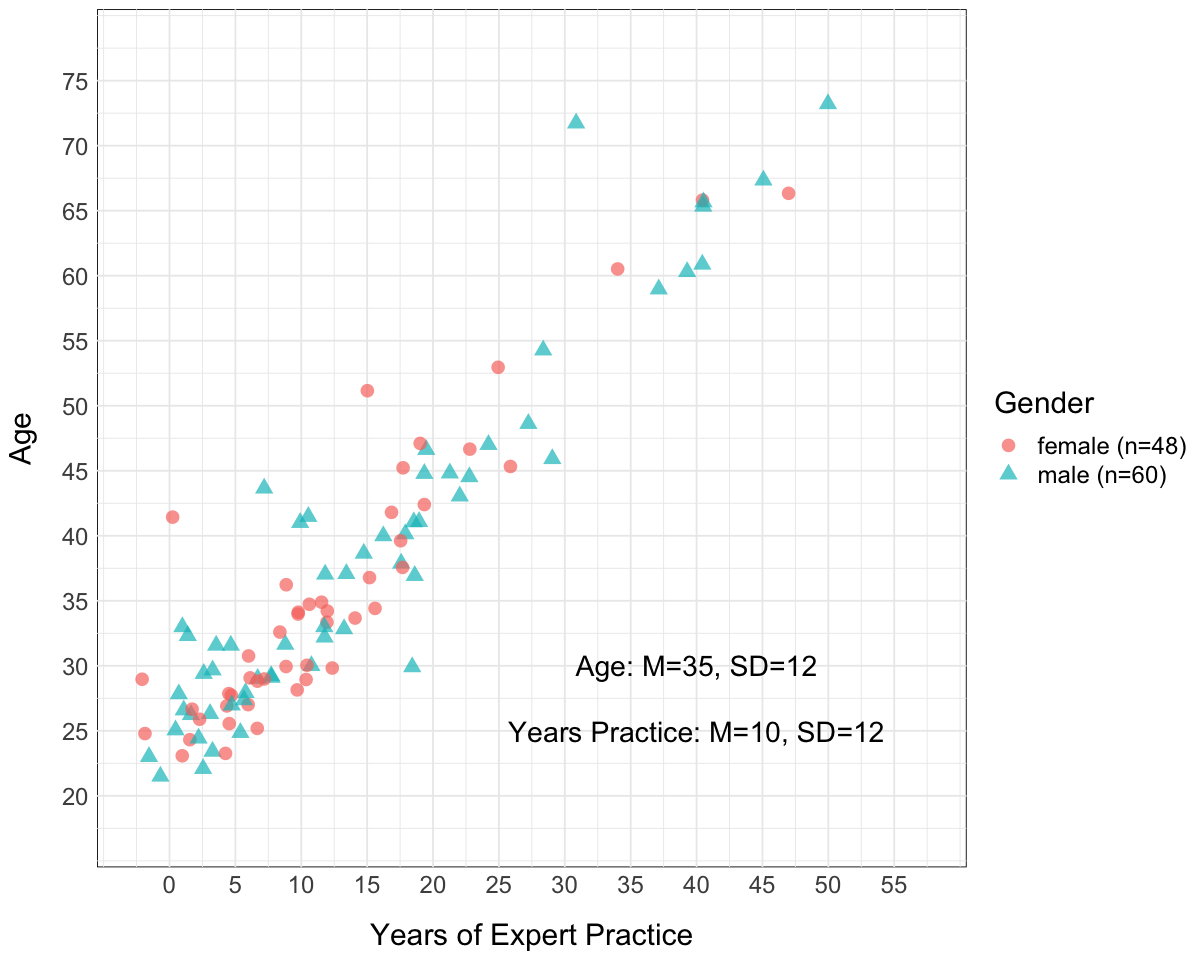

In [6]:
# set plot size
options(repr.plot.width=10, repr.plot.height=8)

# filter out undergraduates and create new list length that reflects number of experts
DataFinal <- filter(DataFinal, Bachelors == 1)
IDlength.expert <- dim(DataFinal)[1]

# Age x YearsPractice x Gender Plot
filter (DataFinal, Gender != "") %>%
ggplot(DataFinal, mapping = aes(x=YearsPractice, y=Age, color=Gender, shape=Gender)) +
    geom_point (size = 3.5, alpha = 0.7, position = position_jitter(width = 2.5, height = 2.5)) +
    scale_x_continuous (name = "Years of Expert Practice", breaks = seq(0, 55, 5), limits=c(-2.5, 57.5)) +
    scale_y_continuous (breaks = seq(20, 75, 5), limits=c(17.5, 77.5)) +
    scale_color_discrete (labels = c("female (n=48)", "male (n=60)")) +
    scale_shape_discrete (labels = c("female (n=48)", "male (n=60)")) +
    theme_minimal() +
    theme (text=element_text(size=18), 
         legend.position = "right", 
         axis.title.y = element_text(margin = margin(t = 0, r = 15, b = 0, l = 0)),
         axis.title.x = element_text(margin = margin(t = 15, r = 0, b = 0, l = 0)),
         panel.background = element_rect(fill = NA, color = "black")) +
    annotate("text", x=40, y=c(30,25), size = 6, label=c("Age: M=35, SD=12", "Years Practice: M=10, SD=12"))

In [7]:
# THESE VARIABLES NEED TO BE CLEANED UP BEFORE PLOTTING
# AcademicPosition - change how pulled above
# GeoIdentity - change how pulled above
# GeoSpecialization - recode outside notebook and pull back in

### In the simulated scenario, participants were asked to imagine they were studying the relationship between sediment moisture and erodibility at White Sands. They were provided the hypothesis displayed in blue on the photo below. At the crest of the dune, where soil was driest because of its distance from the groundwater table (orange line), erodibility was expected to be low. As moisture increased on the stoss face moving towards the interdune, erodibility was expected to also increase before leveling off at the point of moisture saturation. Unbeknownst to participants, they were randomly assigned to sample from a data set that either supported this hypothesis, or a data set that refuted the hypothesis (in green). In the alternative data set, shear strength decreased slightly as soil became more saturated nearing the interdune area just before levelling off.

<img src="Hypo.png" width="500" height="200" align="left" />

### *Here, we plot participants accuracy and confidence in their judgment about the hypothesis.*

`summarise()` regrouping output by 'ConclusionACC' (override with `.groups` argument)

`summarise()` regrouping output by 'ConclusionACC' (override with `.groups` argument)



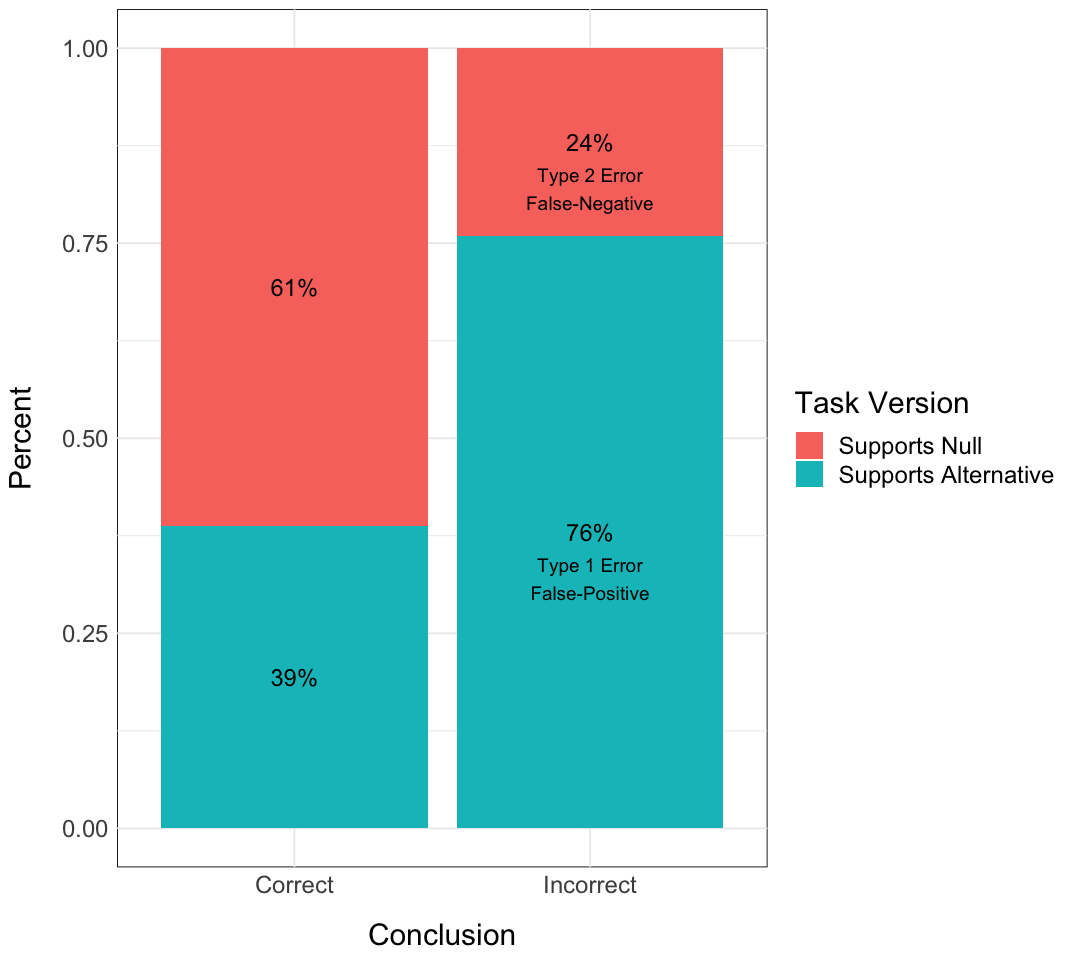

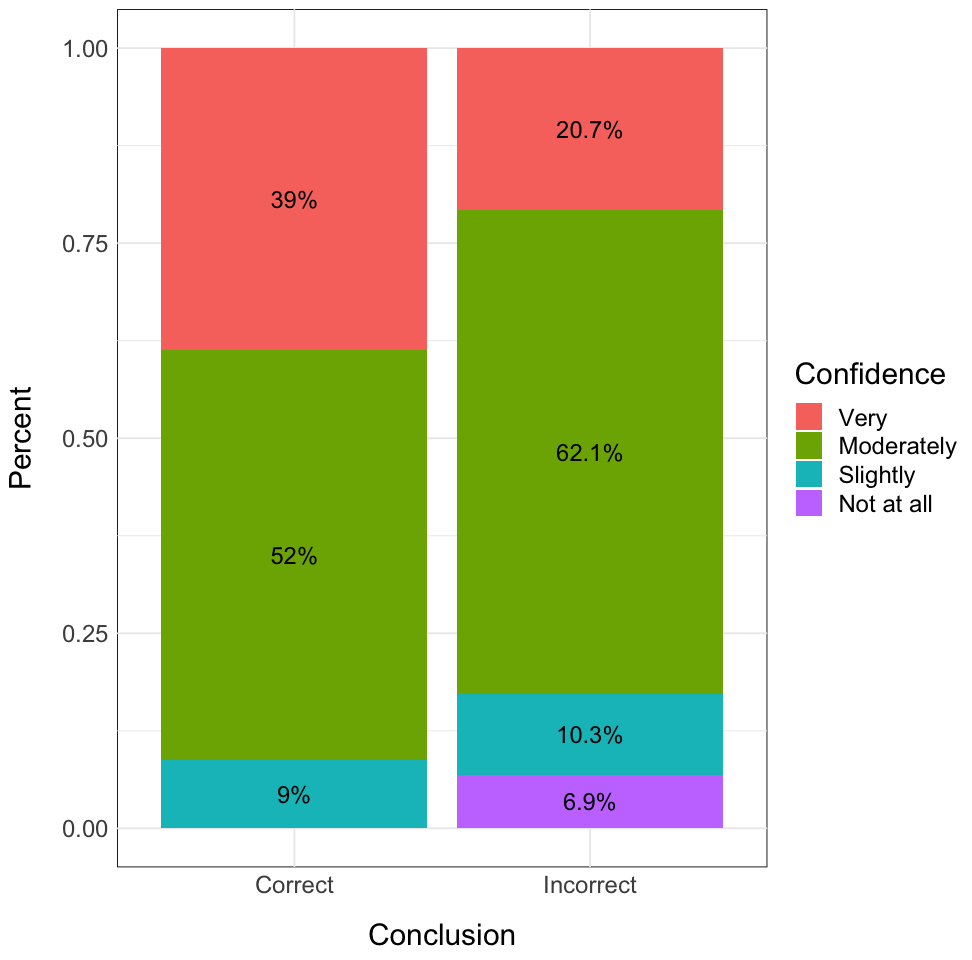

In [13]:
# ConclusionACC x Version Plot
# tells us if ACC differed by what data set you were assigned to - and resulting error type 
DataFinal$Version <- factor(DataFinal$Version, c("Null", "Alternative"))
options(repr.plot.width=8.9, repr.plot.height=8)
plotdata <- DataFinal %>% group_by(ConclusionACC, Version) %>% summarize (n = n()) %>%  
    mutate (pct = n/sum(n),lbl = scales::percent(pct))
ggplot(plotdata, mapping = aes(x=ConclusionACC, y=pct, fill=Version)) +
    geom_bar(stat= "identity", position="fill") +
    scale_y_continuous (name = "Percent") +
    scale_x_discrete (name = "Conclusion") +
    scale_fill_discrete (name = "Task Version", labels = c("Supports Null", "Supports Alternative")) +
    theme_minimal() +
    theme (text=element_text(size=18), 
         legend.position = "right", 
         axis.title.y = element_text(margin = margin(t = 0, r = 15, b = 0, l = 0)),
         axis.title.x = element_text(margin = margin(t = 15, r = 0, b = 0, l = 0)),
         panel.background = element_rect(fill = NA, color = "black")) +
    geom_text (aes(label= lbl), size = 5, position = position_stack(vjust = 0.5)) +
    annotate("text", x=2, y=c(.82,.32), size = 4, label=c("Type 2 Error\nFalse-Negative", "Type 1 Error\nFalse-Positive"))

# ConclusionACC x ConclusionConfidence
# tells us if confidence differed between those who decided correctly/incorrectly
DataFinal$ConclusionConfidence <- factor(DataFinal$ConclusionConfidence, 
                                         c("Very confident in my conclusion", "Moderately confident in my conclusion",
                                           "Slightly confident in my conclusion", "Not at all confident in my conclusion"))
options(repr.plot.width=8.1, repr.plot.height=8)
plotdata <- DataFinal %>% group_by(ConclusionACC, ConclusionConfidence) %>% summarize (n = n()) %>%  
    mutate (pct = n/sum(n),lbl = scales::percent(pct))
ggplot(plotdata, mapping = aes(x=ConclusionACC, y=pct, fill=ConclusionConfidence)) +
    geom_bar(stat= "identity", position="fill") +
    scale_y_continuous (name = "Percent") +
    scale_x_discrete (name = "Conclusion") +
    scale_fill_discrete (name = "Confidence", labels = c("Very", "Moderately", "Slightly", "Not at all")) +
    theme_minimal() +
    theme (text=element_text(size=18), 
         legend.position = "right", 
         axis.title.y = element_text(margin = margin(t = 0, r = 15, b = 0, l = 0)),
         axis.title.x = element_text(margin = margin(t = 15, r = 0, b = 0, l = 0)),
         panel.background = element_rect(fill = NA, color = "black")) +
    geom_text (aes(label= lbl), size = 5, position = position_stack(vjust = 0.5))

### *As a manipulation check at the end of the task, we gave participants several data plots and asked them to report whether they supported or refuted the given hypothesis. ... CONTINUE AND CONNECT TO THOSE WHO GAVE INCORRECT RESPONSES*

In [14]:
# subset manipulation check data from DataFinal for plotting
var.ACC <- c("ID", "SupportingPlot.33dataACC", "RefutingPlot.33dataACC", "SupportingPlot.220dataACC", 
             "RefutingPlot.220dataACC")
ACC <- DataFinal[var.ACC] 
ACC <- gather (ACC, "Type", "ACC", -ID)
ACC$Type <- ifelse(ACC$Type == "SupportingPlot.33dataACC", "S.33", 
                          ifelse(ACC$Type == "RefutingPlot.33dataACC", "R.33",
                                 ifelse(ACC$Type == "SupportingPlot.220dataACC", "S.220", "R.220")))

var.Conf <- c("ID", "SupportingPlot.33data.Confidence", "RefutingPlot.33data.Confidence",
              "SupportingPlot.220data.Confidence", "RefutingPlot.220data.Confidence")
Conf <- DataFinal[var.Conf]
Conf <- gather (Conf, "Type", "Conf", -ID) 
Conf$Type <- ifelse(Conf$Type == "SupportingPlot.33data.Confidence", "S.33", 
                        ifelse(Conf$Type == "RefutingPlot.33data.Confidence", "R.33",
                               ifelse(Conf$Type == "SupportingPlot.220data.Confidence", "S.220", "R.220")))  

Data.MCheck <- full_join(ACC, Conf, by = c("ID", "Type"))
Data.MCheck$Conf <- unlist (Data.MCheck$Conf)
#Data.MCheck # print data frame for debugging purposes